In [10]:
# jupyter lab

In [7]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from datetime import datetime
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
import os  

In [8]:
download_dir = os.path.abspath("juyuso")  # 현재 디렉토리 기준 juyuso 폴더
os.makedirs(download_dir, exist_ok=True)

options = Options()
options.binary_location = './chrome-win64/chrome-win64/chrome.exe'
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--window-size=1920,1080')
options.add_experimental_option("prefs", {
    "download.default_directory": download_dir,
    "download.prompt_for_download": False,
    "download.directory_upgrade": True,
    "safebrowsing.enabled": True
})


service = Service('chromedriver.exe')
driver = webdriver.Chrome(service=service, options=options)
driver.get('https://www.opinet.co.kr/')
print(driver.title)

wait = WebDriverWait(driver, 10)

# 메뉴 접근
hover_element = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, '#header > div > ul > li:nth-child(1)')))
menu_option = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'#header > div > ul > li:nth-child(1) > ul > li:nth-child(1) > a')))

actions = ActionChains(driver)
actions.move_to_element(hover_element).perform()

time.sleep(1)
menu_option.click()
time.sleep(3)
print('지역검색중')

driver.find_element(By.CSS_SELECTOR,"#SIDO_NM0 > option:nth-child(3)").click()
time.sleep(1)
print('부산검색중')

# 군/구 선택 반복
for i in range(2, 18):
    sigungu_option_selector = f"#SIGUNGU_NM0 > option:nth-child({i})"
    try:
        driver.find_element(By.CSS_SELECTOR, sigungu_option_selector).click()
        sigungu_name = driver.find_element(By.CSS_SELECTOR, sigungu_option_selector).text
        print(f'{sigungu_name} 검색중')
        time.sleep(1)

        driver.find_element(By.CSS_SELECTOR,"#templ_list0 > div:nth-child(7) > div > a").click()
        print(f'{sigungu_name} 다운로드중')
        time.sleep(2)
    except Exception as e:
        print(f"Error on option {i}: {e}")
        continue

print('모든 구/군 완료')

싼 주유소 찾기 오피넷
지역검색중
부산검색중
강서구 검색중
강서구 다운로드중
금정구 검색중
금정구 다운로드중
기장군 검색중
기장군 다운로드중
남구 검색중
남구 다운로드중
동구 검색중
동구 다운로드중
동래구 검색중
동래구 다운로드중
부산진구 검색중
부산진구 다운로드중
북구 검색중
북구 다운로드중
사상구 검색중
사상구 다운로드중
사하구 검색중
사하구 다운로드중
서구 검색중
서구 다운로드중
수영구 검색중
수영구 다운로드중
연제구 검색중
연제구 다운로드중
영도구 검색중
영도구 다운로드중
중구 검색중
중구 다운로드중
해운대구 검색중
해운대구 다운로드중
모든 구/군 완료


In [ ]:
# docker jupyter

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
import numpy as np
import seaborn as sns

from hdfs import InsecureClient

In [50]:
hdfs = InsecureClient("http://namenode:9870", user = "hadoop")
paths = ["지역_위치별(주유소).xls","지역_위치별(주유소) (1).xls","지역_위치별(주유소) (2).xls","지역_위치별(주유소) (3).xls","지역_위치별(주유소) (4).xls","지역_위치별(주유소) (5).xls","지역_위치별(주유소) (6).xls","지역_위치별(주유소) (7).xls","지역_위치별(주유소) (8).xls","지역_위치별(주유소) (9).xls","지역_위치별(주유소) (10).xls","지역_위치별(주유소) (11).xls","지역_위치별(주유소) (12).xls","지역_위치별(주유소) (13).xls","지역_위치별(주유소) (14).xls","지역_위치별(주유소) (15).xls",]
datas = []
for path in paths:
    with hdfs.read(path) as reader:
        content = reader.read()
        df = pd.read_excel(BytesIO(content), engine='xlrd')  # 설치된 후 가능
        datas.append(df)

datas

[   지역_위치별(주유소)           Unnamed: 1                 Unnamed: 2 Unnamed: 3  \
 0          NaN                  NaN                        NaN        NaN   
 1           지역                   상호                         주소         상표   
 2        부산광역시                해안주유소            부산 강서구 낙동남로 432      SK에너지   
 3        부산광역시     신창에너지㈜직영 송정셀프주유소      부산 강서구 낙동남로 127 (송정동)      S-OIL   
 4        부산광역시               우리2주유소            부산 강서구 낙동북로 142      알뜰주유소   
 5        부산광역시                서강주유소       부산 강서구 낙동북로 42 (강동동)      SK에너지   
 6        부산광역시          은마석유 경기장주유소            부산 강서구 낙동북로 364      GS칼텍스   
 7        부산광역시        동방석유㈜직영 대저주유소     부산 강서구 낙동북로 209 (대저1동)      SK에너지   
 8        부산광역시         은마석유(주)신호주유소           부산 강서구  낙동남로 514   HD현대오일뱅크   
 9        부산광역시             (주)경인에너지        부산 강서구 생곡로 40 (녹산동)      S-OIL   
 10       부산광역시                구랑주유소      부산 강서구 가락대로 546 (구랑동)      GS칼텍스   
 11       부산광역시              명지농협주유소    부산 강서구 르노삼성대로 572 (명지동) 

In [54]:
import pandas as pd
from io import BytesIO
from hdfs import InsecureClient
import folium

# HDFS 클라이언트 설정
hdfs = InsecureClient("http://namenode:9870", user="hadoop")
paths = ["지역_위치별(주유소).xls", "지역_위치별(주유소) (1).xls", "지역_위치별(주유소) (2).xls", 
         "지역_위치별(주유소) (3).xls", "지역_위치별(주유소) (4).xls", "지역_위치별(주유소) (5).xls", 
         "지역_위치별(주유소) (6).xls", "지역_위치별(주유소) (7).xls", "지역_위치별(주유소) (8).xls", 
         "지역_위치별(주유소) (9).xls", "지역_위치별(주유소) (10).xls", "지역_위치별(주유소) (11).xls", 
         "지역_위치별(주유소) (12).xls", "지역_위치별(주유소) (13).xls", "지역_위치별(주유소) (14).xls", 
         "지역_위치별(주유소) (15).xls"]

# 데이터프레임 리스트 초기화
datas = []

# 모든 파일 읽기
for path in paths:
    with hdfs.read(path) as reader:
        content = reader.read()
        df = pd.read_excel(BytesIO(content), engine='xlrd')
        datas.append(df)

# 데이터프레임 통합
all_data = pd.concat(datas, ignore_index=True)

all_data

,지역_위치별(주유소),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위 : 원/리터)
1,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
2,부산광역시,해안주유소,부산 강서구 낙동남로 432,SK에너지,070-8894-3569,Y,-,1549,1399,-
3,부산광역시,신창에너지㈜직영 송정셀프주유소,부산 강서구 낙동남로 127 (송정동),S-OIL,051-972-5104,Y,-,1549,1409,-
4,부산광역시,우리2주유소,부산 강서구 낙동북로 142,알뜰주유소,051-971-5585,Y,-,1557,1417,-
...,...,...,...,...,...,...,...,...,...,...
374,부산광역시,해운대주유소,부산 해운대구 좌동순환로 375,S-OIL,051-747-2526,Y,-,1633,1513,-
375,부산광역시,HD현대오일뱅크㈜직영 장산IC주유소,부산 해운대구 양운로 107 (좌동),HD현대오일뱅크,051-704-5189,N,2032,1649,1539,-
376,부산광역시,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,SK에너지,051-784-2999,Y,-,1649,1549,-
377,부산광역시,에스씨(주) 마리나타운주유소,부산 해운대구 해운대해변로 44 (우동),GS칼텍스,051-741-7030,N,1898,1698,1598,-


In [55]:
# 데이터 열 확인
print(all_data.columns)  # 현재 열 이름 확인
print(all_data.shape)     # 데이터프레임의 형태 확인

Index(['지역_위치별(주유소)', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')
(379, 10)


In [69]:
expected_columns = ['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유','실내등유']

all_data = all_data.dropna(how='all')
all_data = all_data.dropna(subset=['지역', '상호', '주소'])

all_data

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
1,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
2,부산광역시,해안주유소,부산 강서구 낙동남로 432,SK에너지,070-8894-3569,Y,-,1549,1399,-
3,부산광역시,신창에너지㈜직영 송정셀프주유소,부산 강서구 낙동남로 127 (송정동),S-OIL,051-972-5104,Y,-,1549,1409,-
4,부산광역시,우리2주유소,부산 강서구 낙동북로 142,알뜰주유소,051-971-5585,Y,-,1557,1417,-
5,부산광역시,서강주유소,부산 강서구 낙동북로 42 (강동동),SK에너지,051-971-8484,Y,-,1557,1417,-
...,...,...,...,...,...,...,...,...,...,...
374,부산광역시,해운대주유소,부산 해운대구 좌동순환로 375,S-OIL,051-747-2526,Y,-,1633,1513,-
375,부산광역시,HD현대오일뱅크㈜직영 장산IC주유소,부산 해운대구 양운로 107 (좌동),HD현대오일뱅크,051-704-5189,N,2032,1649,1539,-
376,부산광역시,SK에너지(주)직영 해운대센텀주유소,부산 해운대구 수영강변대로 276,SK에너지,051-784-2999,Y,-,1649,1549,-
377,부산광역시,에스씨(주) 마리나타운주유소,부산 해운대구 해운대해변로 44 (우동),GS칼텍스,051-741-7030,N,1898,1698,1598,-


In [81]:
all_data = all_data.dropna(subset=['휘발유'])

# 휘발유 최저가 주유소 5곳과 비싼 주유소 5곳 추출
lowest_price_stations = all_data.nsmallest(5, '휘발유')
highest_price_stations = all_data.nlargest(5, '휘발유')

# lowest_price_stations
highest_price_stations

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
157,부산광역시,㈜삼현석유 천일주유소,부산 동구 중앙대로 168 (초량동),S-OIL,051-466-1001,N,-,1998.0,1698,-
52,부산광역시,광신석유(주)직영 명지주유소,부산 강서구 르노삼성대로 372,SK에너지,051-271-4405,Y,1959,1899.0,1897,1799
300,부산광역시,피치스주유소 송도점,부산 서구 감천로 227,S-OIL,051-244-5151,Y,-,1888.0,1408,-
299,부산광역시,㈜한국페트로 스타2주유소,부산 서구 원양로 260,GS칼텍스,051-243-6661,N,-,1868.0,1434,-
342,부산광역시,(주)나부코직영 우원주유소,부산 영도구 태종로 181 (봉래동4가),SK에너지,051-418-7600,N,-,1848.0,1738,1600


Text(0.2, 0.4, '한글')

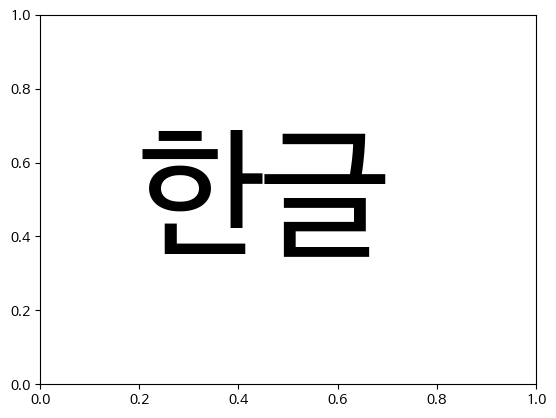

In [84]:
# 리눅스용 폰트 경로 설정
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist
plt.rc('font', family="NanumBarunGothic")
plt.text(0.2,0.4,'한글',size=100)

In [90]:
# GPS정보로 지도에 표시하기
high_gps_path ="./juyuso/high_addr.csv"
high_gps = pd.read_csv(high_gps_path,encoding="utf-8")
high_gps

,Unnamed: 0,주소,Latitude,Longitude
0,1,부산 동구 중앙대로 168 (초량동),35.112306,129.038789
1,2,부산 강서구 르노삼성대로 372,35.089356,128.897599
2,3,부산 서구 감천로 227,35.082180,129.012595
3,4,부산 서구 원양로 260,35.074278,129.006493
4,5,부산 영도구 태종로 181 (봉래동4가),35.091292,129.049336


In [91]:
low_gps_path ="./juyuso/low_addr.csv"
low_gps = pd.read_csv(low_gps_path,encoding="utf-8")
low_gps

,Unnamed: 0,주소,Latitude,Longitude
0,1,부산 동래구 충렬대로 95,35.207439,129.071591
1,2,부산 동래구 충렬대로 121 (온천동),35.206432,129.073920
2,3,부산 동래구 반송로 303 (명장동),35.206779,129.102708
3,4,부산 동래구 충렬대로 124,35.205857,129.073877
4,5,부산 동래구 반송로 245,35.202602,129.098964


In [92]:
import folium
coordinates = gps[['Latitude','Longitude']].to_numpy()
place = gps['주소'].to_numpy()

# 중심좌표 설정(기본위치)
center_lat , center_lon = 35.17574571 , 129.0817409

# 지도생성
m = folium.Map(location=[center_lat , center_lon], zoom_start=12 )


for i, (lat, lon) in enumerate(coordinates):
    folium.CircleMarker(
        location=[lat , lon],
        radius = 30,
        color= 'orange',
        weight=1,  # 테두리 굵기 (기본값: 2)
        opacity=0.5,  # 테두리 투명도 (0.0 ~ 1.0)
        fill = True,
        fill_color = 'yellow',
        fill_opacity = 0.6,
        tooltip = place[i]
    ).add_to(m) # 지도 생성 후 원을 그리고 지도에 붙임

    folium.Marker(
        location = [lat + 0.001, lon],
        icon = folium.DivIcon(f'<div style="font-size: 9px; color: black; background-color: white; width:50px; white-space: nowrap; overflow: hidden; text-overflow: ellipsis; opactiy:0.7; border-radius:5px">{place[i]}</div>')
    ).add_to(m)
    
m